In [11]:
%matplotlib notebook

import sklearn
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('darkgrid')

In [12]:
xs = np.linspace(-5, 5, 100)
ys = np.linspace(-5, 5, 100)

In [13]:
xv, yv = np.meshgrid(xs, ys)

In [14]:
zs = np.add.outer(xs**2, ys**2)

<IPython.core.display.Javascript object>


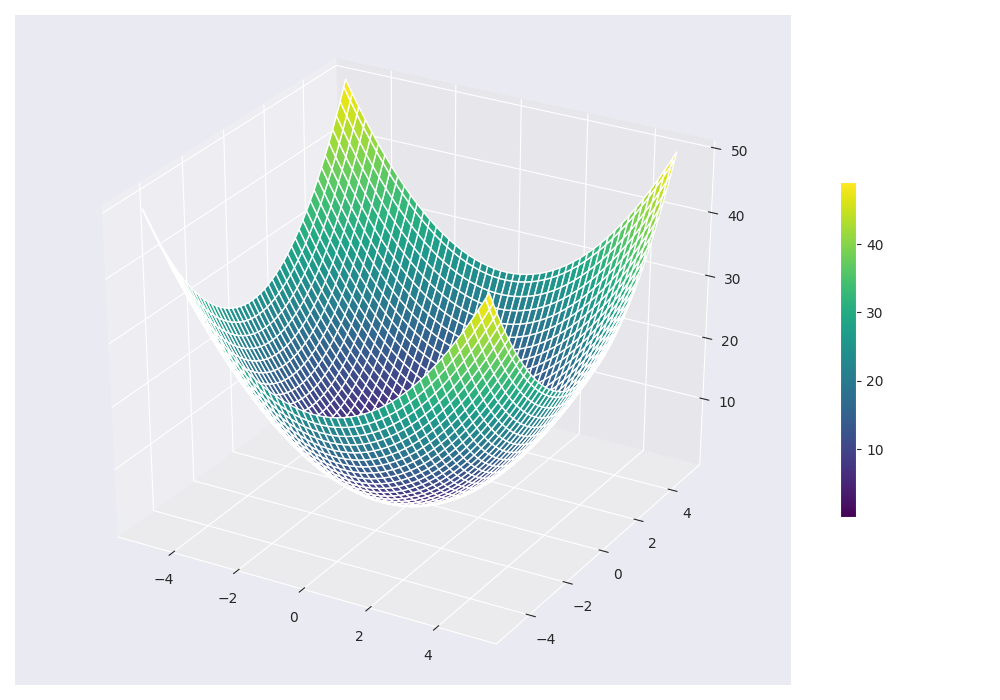

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xv, yv, zs, cmap=cm.viridis)
fig.colorbar(surf, shrink=0.5)
fig.tight_layout()
fig.savefig('objective.png', transparent=True)

In [176]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_, y = datasets.load_boston(return_X_y=True)
X_ = s.fit_transform(X_)

X = np.zeros((X_.shape[0], X_.shape[1] + 1))  # column of 1s for bias term
X[:,:X_.shape[1]] = X_
X[:,X_.shape[1]] = 1
y = y.reshape(-1, 1)

In [177]:
alpha = 5e-2
theta = np.random.rand(X.shape[1]).reshape(-1, 1)

In [178]:
n = 200
errors = np.zeros((n))
for i in range(0, n):
    errors[i] = (((X @ theta) - y) ** 2).mean()
    nabla = ((X.T @ (X @ theta)) - (y.T @ X).T)
    theta = theta - ((alpha / X.shape[0]) * nabla)

<IPython.core.display.Javascript object>


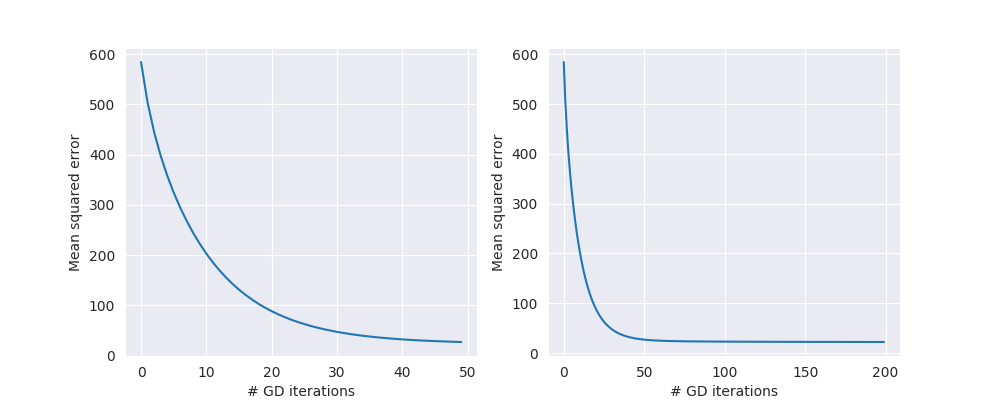

Text(0.5, 0, '# GD iterations')

In [179]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(0, 50), errors[0:50])
plt.ylabel('Mean squared error')
plt.xlabel('# GD iterations')

plt.subplot(1, 2, 2)
plt.plot(range(0, n), errors)
plt.ylabel('Mean squared error')
plt.xlabel('# GD iterations')

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(X, y)
list(reg.coef_.ravel())

[-0.9281460643011903,
 1.0815686278223693,
 0.14089999690428734,
 0.6817397247777983,
 -2.0567182660052157,
 2.674230165239311,
 0.019466071657048944,
 -3.104044258086442,
 2.66221764247363,
 -2.0767816838433726,
 -2.0606066589067598,
 0.8492684177053286,
 -3.7436271264671035,
 22.532806324110645]

In [20]:
((np.linalg.inv(X.T @ X) @ (X.T @ y)))

array([[-9.28146064e-01],
       [ 1.08156863e+00],
       [ 1.40899997e-01],
       [ 6.81739725e-01],
       [-2.05671827e+00],
       [ 2.67423017e+00],
       [ 1.94660717e-02],
       [-3.10404426e+00],
       [ 2.66221764e+00],
       [-2.07678168e+00],
       [-2.06060666e+00],
       [ 8.49268418e-01],
       [-3.74362713e+00],
       [ 2.25328063e+01]])

In [180]:
alpha = 5e-2
theta = np.random.rand(X.shape[1]).reshape(-1, 1)

In [181]:
n = 200 * X.shape[0]
errors_sgd = np.zeros((n))
idxs = np.random.randint(low=0, high=X.shape[0]-1, size=n)
for i in range(0, n):
    errors_sgd[i] = (((X @ theta) - y) ** 2).mean()
    
    X_i = X[np.newaxis, idxs[i], :]
    y_i = y[np.newaxis, idxs[i], :]
    nabla = (X_i.T @ (X_i @ theta)) - (y_i.T @ X_i).T
    theta = theta - ((alpha / X.shape[0]) * nabla)

<IPython.core.display.Javascript object>


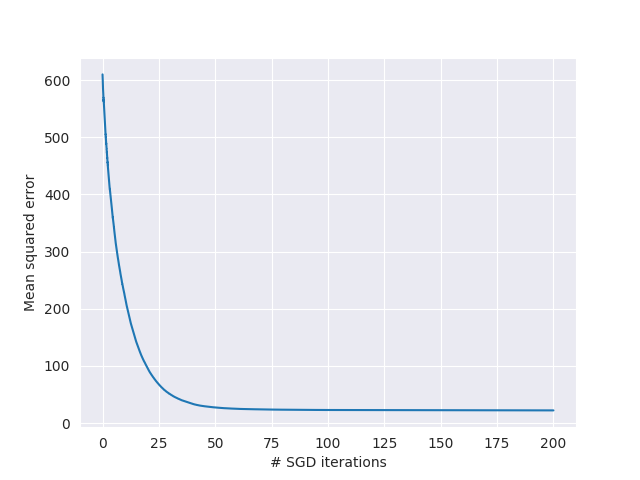

In [183]:
xs = np.linspace(start=0, stop=n+1, num=n) / X.shape[0]

plt.figure()
plt.plot(xs, errors_sgd)
plt.ylabel('Mean squared error')
plt.xlabel('# SGD iterations')

#plt.subplot(2, 1, 2)
#plt.plot(xs[0:50], errors[0:50])
plt.savefig('charlienewey.github.io/images/stochastic-gradient-descent-error.png')

In [104]:
(X_i.T @ (X_i @ theta)) - (y_i.T @ X_i).T

array([[  8.04366255],
       [ 10.7426905 ],
       [  3.97480187],
       [  6.00432182],
       [  2.03494832],
       [  5.38586576],
       [  7.65634519],
       [ -2.16591922],
       [ 14.05190054],
       [ 13.63631266],
       [  0.56556014],
       [ -9.55290889],
       [ -0.23754236],
       [-22.02624133]])

In [28]:
X[103,:]

array([-0.39589168, -0.48772236, -0.37597609, -0.27259857, -0.29970737,
       -0.21032861,  0.66943128, -0.51356157, -0.52300145, -0.14395131,
        1.13022958,  0.41440854,  0.1103079 ,  1.        ])

<IPython.core.display.Javascript object>


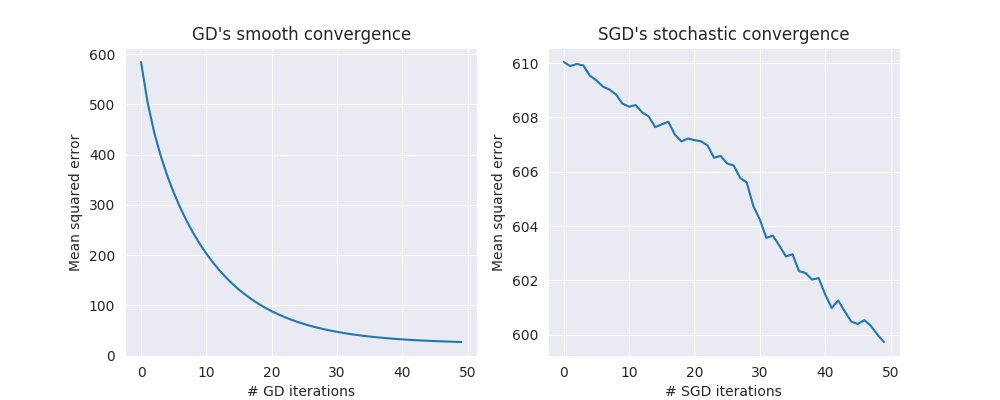

In [194]:
m = 50

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(0, m), errors[0:m])
plt.title('GD\'s smooth convergence')
plt.xlabel('# GD iterations')
plt.ylabel('Mean squared error')

plt.subplot(1, 2, 2)
plt.plot(range(0, m), errors_sgd[0:m])
plt.title('SGD\'s stochastic convergence')
plt.xlabel('# SGD iterations')
plt.ylabel('Mean squared error')

plt.savefig('charlienewey.github.io/images/gradient-descent-stochastic-gd-convergence.png')